# Imports



In [3]:
import numpy as np
import pandas as pd
import pickle
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from tabulate import tabulate
import random
import numpy as np
from scipy import stats

# Setting up

In [86]:
!pip install rouge-score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.7/133.7 kB 1.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24936 sha256=492929fd7174cda479e4962a18c093c9627d26ae6e3dd319b20474fdbe7970bd
  Stored in directory: c:\users\danal\appdata\local\pip\cache\wheels\9b\3d\39\09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge-score


In [4]:

main_path = "C:/Users/danal/PycharmProjects/Summary_Evaluation_3/cor_datasets/"
models = ["gpt2_new", "phi2_new", "phi3_new", "ncdgzip","bart_t_s_cnn","llama13_new","llama7_new","llama70_new","rouge_new","blanc","bart_t_s","bart_t_s_cnn","bert","bertScore"]

datasets = ["summEval", "papers_8", "synopsis_8", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom"]

In [200]:
df =  pd.read_pickle("C:/Users/danal/PycharmProjects/Summary_Evaluation_3/cor_data/yoda/yoda_phi2.pkl")

In [5]:

main_path = "C:/Users/danal/PycharmProjects/Summary_Evaluation_3/cor_datasets/"
models = ["phi2_new","rouge_new","blanc","bart_t_s","bertScore"]
models = ["phi2_new", "phi3_new", "ncdgzip","llama13_new","llama7_new","llama70_new","rouge_new","blanc","bart_t_s","bertScore","bert"]
datasets = ["summEval", "papers_8", "synopsis_8", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom"]

In [77]:
datasets = ["summEval", "papers_8", "synopsis_8", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom"]
datasets_para = ["cnn_para2","hp_para","yoda_para"]

In [6]:
main_path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/summEval/'

In [87]:
path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/summEval/summEval_rouge_new.pkl'
df = pd.read_pickle(path)

In [88]:
#main_path = "C:/Users/danal/PycharmProjects/Summary_Evaluation_3/cor_data/"
datasets = ["summEval", "papers_8", "synopsis_8", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom"]
datasets_para = ["cnn_para2","hp_para","yoda_para"]
main_path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/'
data = {}

for model in models:
    data[model] = {}
    for dataset in datasets:
        print(model,dataset)
        file_path = f"{main_path}{dataset}/{dataset}_{model}.pkl"
        data[model][dataset] = pd.read_pickle(file_path)


phi2_new summEval
phi2_new papers_8
phi2_new synopsis_8
phi2_new poe_8
phi2_new cnn_dailyMail_8
phi2_new HP_8
phi2_new ssf
phi2_new newsroom
phi3_new summEval
phi3_new papers_8
phi3_new synopsis_8
phi3_new poe_8
phi3_new cnn_dailyMail_8
phi3_new HP_8
phi3_new ssf
phi3_new newsroom
ncdgzip summEval
ncdgzip papers_8
ncdgzip synopsis_8
ncdgzip poe_8
ncdgzip cnn_dailyMail_8
ncdgzip HP_8
ncdgzip ssf
ncdgzip newsroom
llama13_new summEval
llama13_new papers_8
llama13_new synopsis_8
llama13_new poe_8
llama13_new cnn_dailyMail_8
llama13_new HP_8
llama13_new ssf
llama13_new newsroom
llama7_new summEval
llama7_new papers_8
llama7_new synopsis_8
llama7_new poe_8
llama7_new cnn_dailyMail_8
llama7_new HP_8
llama7_new ssf
llama7_new newsroom
llama70_new summEval
llama70_new papers_8
llama70_new synopsis_8
llama70_new poe_8
llama70_new cnn_dailyMail_8
llama70_new HP_8
llama70_new ssf
llama70_new newsroom
rouge_new summEval
rouge_new papers_8
rouge_new synopsis_8
rouge_new poe_8
rouge_new cnn_dailyMail

In [89]:
models = ["phi2_new","blanc","rouge_new","bart_t_s","bertScore","ncdgzip"]
datasets_para = ["cnn_para2","hp_para","yoda_para"]
main_path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/'
data_para = {}

for model in models:
    data_para[model] = {}
    for dataset in datasets_para:
        file_path = f"{main_path}{dataset}/{dataset}_{model}.pkl"
        data_para[model][dataset] = pd.read_pickle(file_path)


In [ ]:
def bootstrap_get_sample(annotations,llg):
    annotations_new, llg_new = [],[]
    for i in range(len(llg)):
        rand_idx = random.randint(0,len(llg)-1)
        annotations_new.append(annotations[rand_idx])
        llg_new.append(llg[rand_idx])
    return round(kendalltau(annotations_new, llg_new)[0],2),round(pearsonr(annotations_new, llg_new)[0],2)



def bootstrap(annotations,llg):
    samples_k,samples_p = [],[]
    for _ in range(1000): 
        k,p = bootstrap_get_sample(annotations,llg)
        samples_k.append(k)
        samples_p.append(p)
    return round(np.std(samples_k),3), round(np.std(samples_p),3) 

def extract_list(obj):
    while isinstance(obj, list) and isinstance(obj[0], list):
        obj = obj[0]
    if isinstance(obj, list): return obj
    else: return [obj]

def unpack_list(X):
    if all(isinstance(i, list) and len(i) == 1 for i in X):
        return [i[0] for i in X]
    else:
        return X

In [71]:

def cor_with_annotators(df, metric, dim):
  if dim is not None: 
    df["annotations"] = df["annotations"].apply(extract_list)
    annotation_list = df["annotations"].apply(lambda x: x[0][dim]).tolist()
  else:
    annotation_list = df["annotations"].tolist()
    annotation_list = unpack_list(annotation_list)
  if metric == "ncdGzip": score_list = df["ncdGzip"].tolist()
  elif metric == "blanc": score_list = df["blanc"].tolist()
  elif metric == "bart_t_s_cnn": score_list = df["bart"].tolist()
  elif metric == "bart_t_s": score_list = df["bart"].tolist()
  elif metric in ["rouge1","rouge2","rougeL"]: score_list = [item[metric].recall for item in df['rouge']]
  elif metric in ["precision","recall","f1"]: score_list = [item[metric][0] for item in df["bertScore"]]
  else: score_list = df["llg"].apply(lambda x: x[0][metric]).tolist()
  boot_k,boot_p =  bootstrap(annotation_list,score_list)
  return "K="+ str(round(kendalltau(annotation_list, score_list)[0],2)) + " (" + str(boot_k) +")", "P=" + str(round(kendalltau(annotation_list, score_list)[0],2)) +  " (" + str(boot_p) +")"


In [69]:
def get_cor_per_model(metrics,models):
    summEval, newsroom, synopsis, poe, cnn, hp, ssf = [],[],[],[],[],[],[]
    for dataset in datasets:
        for metric,model in zip(metrics,models):
            if dataset == "summEval": summEval.append(cor_with_annotators(data[model][dataset],metric,"relevance"))
            if dataset == "newsroom": newsroom.append(cor_with_annotators(data[model][dataset],metric,"informativeness"))
            if dataset == "ssf": ssf.append(cor_with_annotators(data[model][dataset],metric,"coverage"))
            if dataset == "synopsis_8": synopsis.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "cnn_dailyMail_8": cnn.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "poe_8": poe.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "HP_8": hp.append(cor_with_annotators(data[model][dataset],metric,None))
    return(summEval,newsroom, synopsis, poe, cnn,hp, ssf)

In [68]:
def get_cor_per_model_para(metrics,models):
    cnn_p, hp_p, yoda_p = [],[],[]
    for dataset in datasets_para:
        for metric,model in zip(metrics,models):
            if dataset == "cnn_para2": cnn_p.append(cor_with_annotators(data_para[model][dataset],metric,None))
            if dataset == "hp_para": hp_p.append(cor_with_annotators(data_para[model][dataset],metric,None))
            if dataset == "yoda_para": yoda_p.append(cor_with_annotators(data_para[model][dataset],metric,None))

    return cnn_p, hp_p, yoda_p

In [34]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])
h_values = [summEval,newsroom, ssf,cnn,poe,hp,cnn_p, hp_p, yoda_p]
#print(h_values)
model_names = ["LLG","NLLG","NCD","Blanc","BART","ROUGUE","BERT"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP","CNN-para","HP-para","Sentences"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

In [283]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])
h_values = [summEval,newsroom, ssf,cnn,poe,hp]
#print(h_values)
model_names = ["LLG","NLLG","NCD","Blanc","BART","ROUGUE","BERT"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.18 (0.023) 0.18 0.023
0.54 (0.023) 0.54 0.023
0.26 (0.012) 0.26 0.012
0.61 (0.012) 0.61 0.012
0.55 (0.026) 0.55 0.026
0.6 (0.02) 0.6 0.02
0.15 (0.021) 0.15 0.021
0.45 (0.028) 0.45 0.028
0.25 (0.012) 0.25 0.012
0.55 (0.014) 0.55 0.014
0.55 (0.024) 0.55 0.024
0.61 (0.02) 0.61 0.02
0.18 (0.021) 0.18 0.021
0.44 (0.028) 0.44 0.028
0.26 (0.011) 0.26 0.011
0.45 (0.016) 0.45 0.016
0.48 (0.028) 0.48 0.028
0.56 (0.025) 0.56 0.025
0.13 (0.023) 0.13 0.023
0.48 (0.027) 0.48 0.027
0.26 (0.013) 0.26 0.013
0.39 (0.017) 0.39 0.017
0.3 (0.033) 0.3 0.033
0.36 (0.036) 0.36 0.036
0.27 (0.023) 0.27 0.023
0.5 (0.023) 0.5 0.023
0.15 (0.017) 0.15 0.017
0.43 (0.018) 0.43 0.018
0.06 (0.042) 0.06 0.042
0.06 (0.048) 0.06 0.048
0.13 (0.019) 0.13 0.019
0.49 (0.029) 0.49 0.029
0.27 (0.011) 0.27 0.011
0.48 (0.014) 0.48 0.014
0.46 (0.025) 0.46 0.025
0.6 (0.02) 0.6 0.02
0.31 (0.023) 0.31 0.023
0.48 (0.029) 0.48 0.029
0.2 (0.017) 0.2 0.017
0.63 (0.011) 0.63 0.011
0.56 (0.021) 0.56 0.021
0.61 (0.018) 0.61 0.018

    \be

In [284]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","NLLG","ncdGzip","blanc","bart_t_s","rougeL","precision"],["phi2_new", "phi2_new","ncdgzip","blanc","bart_t_s","rouge_new","bertScore"])
h_values = [cnn_p, hp_p, yoda_p]
#print(h_values)
model_names = ["LLG","NLLG","NCD","Blanc","BART","ROUGUE","BERT"]
data_names = ["CNN-para","HP-para","Sentences"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.4 (0.033) 0.4 0.033
0.32 (0.079) 0.32 0.079
0.7 (0.01) 0.7 0.01
0.68 (0.014) 0.68 0.014
0.34 (0.079) 0.34 0.079
0.71 (0.007) 0.71 0.007
0.37 (0.037) 0.37 0.037
-0.45 (0.071) -0.45 0.071
0.7 (0.011) 0.7 0.011
0.2 (0.045) 0.2 0.045
-0.31 (0.081) -0.31 0.081
0.36 (0.04) 0.36 0.04
-0.71 (0.002) -0.71 0.002
-0.71 (0.008) -0.71 0.008
-0.7 (0.01) -0.7 0.01
0.71 (0.007) 0.71 0.007
0.42 (0.079) 0.42 0.079
0.4 (0.038) 0.4 0.038
-0.71 (0.006) -0.71 0.006
-0.71 (0.008) -0.71 0.008
-0.71 (0.007) -0.71 0.007

    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|c|c|c|}
        \hline
         \textbf{Measure}
         &\texttt{CNN-para} & \texttt{HP-para} & \texttt{Sentences}\\
         \hline
         \texttt{LLG} 
        & 0.4 (0.033) & \textbf{0.32 (0.079)} & \textbf{0.7 (0.01)}\\
         \hline
         \texttt{NLLG} 
        & \textbf{0.68 (0.014)} & \textbf{0.34 (0.079)} & \textbf{\textbf{0.71 (0.007)}}\\
         \hline
         \

In [285]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])
h_values = [summEval,newsroom, ssf,cnn,poe,hp]
#print(h_values)
model_names = ["LLG","Content","Function"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.18 (0.023) 0.18 0.023
0.54 (0.025) 0.54 0.025
0.26 (0.012) 0.26 0.012
0.61 (0.012) 0.61 0.012
0.55 (0.025) 0.55 0.025
0.6 (0.021) 0.6 0.021
0.17 (0.023) 0.17 0.023
0.54 (0.024) 0.54 0.024
0.27 (0.012) 0.27 0.012
0.6 (0.011) 0.6 0.011
0.54 (0.025) 0.54 0.025
0.59 (0.021) 0.59 0.021
0.15 (0.023) 0.15 0.023
0.47 (0.03) 0.47 0.03
0.15 (0.014) 0.15 0.014
0.34 (0.018) 0.34 0.018
0.34 (0.033) 0.34 0.033
0.4 (0.032) 0.4 0.032

    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         \textbf{Measure}
         &\texttt{summEval} & \texttt{Newsroom} & \texttt{SFF} & \texttt{CNN} & \texttt{Poe} & \texttt{HP}\\
         \hline
         \texttt{LLG} 
        & \textbf{\textbf{0.18 (0.023)}} & \textbf{\textbf{0.54 (0.025)}} & \textbf{0.26 (0.012)} & \textbf{\textbf{0.61 (0.012)}} & \textbf{\textbf{0.55 (0.025)}} & \textbf{\textbf{0.6 (0.021)}}\\
         \hline
         \texttt{Content} 
        & \textbf{0

In [286]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])
h_values = [cnn_p, hp_p, yoda_p]
#print(h_values)
model_names = ["LLG","Content","Function"]
data_names = ["CNN-para","HP-para","Sentences"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.4 (0.034) 0.4 0.034
0.32 (0.074) 0.32 0.074
0.7 (0.01) 0.7 0.01
0.43 (0.031) 0.43 0.031
0.29 (0.075) 0.29 0.075
0.64 (0.021) 0.64 0.021
0.26 (0.042) 0.26 0.042
0.2 (0.087) 0.2 0.087
0.5 (0.031) 0.5 0.031

    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|c|c|c|}
        \hline
         \textbf{Measure}
         &\texttt{CNN-para} & \texttt{HP-para} & \texttt{Sentences}\\
         \hline
         \texttt{LLG} 
        & \textbf{0.4 (0.034)} & \textbf{\textbf{0.32 (0.074)}} & \textbf{\textbf{0.7 (0.01)}}\\
         \hline
         \texttt{Content} 
        & \textbf{\textbf{0.43 (0.031)}} & \textbf{0.29 (0.075)} & 0.64 (0.021)\\
         \hline
         \texttt{Function} 
        & 0.26 (0.042) & \textbf{0.2 (0.087)} & 0.5 (0.031)\\
         \hline
    \end{tabular}
    \caption{Your caption here}
    \end{table*}


In [44]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","LLG","LLG","LLG","LLG"],["phi2_new","phi3_new" ,"llama7_new","llama13_new","llama70_new"])
h_values = [summEval,newsroom,ssf,cnn,poe,hp]
model_names = ["phi2","phi3","Llama7b-chat","Llama13b-chat","Llama70b-chat"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.18 (0.024) 0.18 0.024
0.54 (0.023) 0.54 0.023
0.26 (0.012) 0.26 0.012
0.61 (0.012) 0.61 0.012
0.55 (0.025) 0.55 0.025
0.6 (0.021) 0.6 0.021
0.19 (0.022) 0.19 0.022
0.55 (0.023) 0.55 0.023
0.27 (0.012) 0.27 0.012
0.6 (0.011) 0.6 0.011
0.5 (0.026) 0.5 0.026
0.64 (0.021) 0.64 0.021
0.17 (0.024) 0.17 0.024
0.54 (0.024) 0.54 0.024
0.22 (0.012) 0.22 0.012
0.55 (0.012) 0.55 0.012
0.44 (0.03) 0.44 0.03
0.54 (0.023) 0.54 0.023
0.18 (0.024) 0.18 0.024
0.54 (0.024) 0.54 0.024
0.23 (0.012) 0.23 0.012
0.55 (0.012) 0.55 0.012
0.3 (0.037) 0.3 0.037
0.56 (0.024) 0.56 0.024
0.18 (0.023) 0.18 0.023
0.54 (0.023) 0.54 0.023
0.25 (0.013) 0.25 0.013
0.59 (0.011) 0.59 0.011
-0.02 (0.044) -0.02 0.044
0.29 (0.043) 0.29 0.043

    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         \textbf{Measure}
         &\texttt{summEval} & \texttt{Newsroom} & \texttt{SFF} & \texttt{CNN} & \texttt{Poe} & \texttt{HP}\\
         \h

In [93]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])

cnn_p, hp_p, yoda_p = get_cor_per_model_para(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])
h_values = [summEval,newsroom, ssf,cnn,poe,hp,cnn_p, hp_p, yoda_p]
#print(h_values)
model_names = ["LLG","Content","Function"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP","CNN-para","HP-para","Sentences"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

0.18 (0.023) 0.18 0.023
0.54 (0.024) 0.54 0.024
0.26 (0.012) 0.26 0.012
0.61 (0.011) 0.61 0.011
0.55 (0.026) 0.55 0.026
0.6 (0.02) 0.6 0.02
0.4 (0.033) 0.4 0.033
0.32 (0.074) 0.32 0.074
0.7 (0.01) 0.7 0.01
0.17 (0.023) 0.17 0.023
0.54 (0.024) 0.54 0.024
0.27 (0.012) 0.27 0.012
0.6 (0.012) 0.6 0.012
0.54 (0.024) 0.54 0.024
0.59 (0.022) 0.59 0.022
0.43 (0.033) 0.43 0.033
0.29 (0.074) 0.29 0.074
0.64 (0.02) 0.64 0.02
0.15 (0.023) 0.15 0.023
0.47 (0.03) 0.47 0.03
0.15 (0.014) 0.15 0.014
0.34 (0.018) 0.34 0.018
0.34 (0.032) 0.34 0.032
0.4 (0.032) 0.4 0.032
0.26 (0.043) 0.26 0.043
0.2 (0.083) 0.2 0.083
0.5 (0.03) 0.5 0.03

    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
        \hline
         \textbf{Measure}
         &\texttt{summEval} & \texttt{Newsroom} & \texttt{SFF} & \texttt{CNN} & \texttt{Poe} & \texttt{HP} & \texttt{CNN-para} & \texttt{HP-para} & \texttt{Sentences}\\
         \hline
         \texttt{

In [67]:
summEval,newsroom, synopsis, poe, cnn,hp, ssf = get_cor_per_model(["LLG","LLG_content","LLG_function"],["phi2_new", "phi2_new","phi2_new"])
h_values = [summEval,newsroom,ssf,cnn,poe,hp]
model_names = ["LLG","LLG_content","LLG_function"]
data_names = ["summEval","Newsroom","SFF","CNN","Poe","HP"]
print(generate_full_width_latex_table(model_names, h_values,data_names))

NameError: name 'get_cor_per_model' is not defined

In [14]:
def get_cor_per_model(metrics,models):
    summEval, newsroom, synopsis, poe, papers, cnn, hp, ssf, yoda = [],[],[],[],[],[],[],[],[]
    for dataset in datasets:
        for metric,model in zip(metrics,models):
            if dataset == "summEval": summEval.append(cor_with_annotators(data[model][dataset],metric,"relevance"))
            if dataset == "newsroom": newsroom.append(cor_with_annotators(data[model][dataset],metric,"informativeness"))
            if dataset == "ssf": ssf.append(cor_with_annotators(data[model][dataset],metric,"coverage"))
            if dataset == "synopsis_8": synopsis.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "papers_8": papers.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "cnn_dailyMail_8": cnn.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "poe_8": poe.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "HP_8": hp.append(cor_with_annotators(data[model][dataset],metric,None))
            if dataset == "yoda": yoda.append(cor_with_annotators(data[model][dataset],metric,None))
    return(summEval,newsroom, synopsis, poe, papers, cnn,hp, ssf,yoda)

In [177]:
# # z test - fisher
# def paired_t_test(mean1, mean2, se1, se2,data_name):
#     sample_counts = {'summEval': 1700, "Newsroom": 405, "SFF": 4500, "CNN" : 1763,"Papers" : 3200 ,"Synopsis" : 3712 ,"Poe":560,"HP":424}
#     df = sample_counts[data_name]
#     t_stat = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)

#     df =  2*df  -2

#     p_value = 2 * stats.t.sf(np.abs(t_stat), df)
#     if p_value < 0.05: return False
#     else: return True


In [91]:
from scipy import stats
import numpy as np

def paired_t_test(mean1, mean2, se1, se2, data_names):
    """
    Perform a Z-test for paired samples.

    Parameters:
    mean1 (float): Mean of the first sample
    mean2 (float): Mean of the second sample
    se1 (float): Standard error of the first sample
    se2 (float): Standard error of the second sample

    Returns:
    bool: True if the null hypothesis cannot be rejected (means are similar), 
          False otherwise (means are significantly different)
    """
    # Calculate the Z-statistic
    z_stat = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)
    
    # Calculate the p-value (two-tailed)
    p_value = 2 * stats.norm.sf(np.abs(z_stat))  # Using standard normal distribution

    # Return whether the null hypothesis is rejected
    if p_value < 0.05: return False
    else: return True

In [92]:
def generate_full_width_latex_table(model_names, h_values, data_names):
    k = len(model_names)  # Number of models
    d = len(h_values)  # Number of datasets
    
    # Define the width of each column manually to avoid stretching beyond the page width
    col_width = "c|"  # Split the width based on the number of datasets

    latex_code = r"""
    \begin{table*}[htbp]
    \renewcommand{\arraystretch}{0.9}
    \centering
    \small
    \begin{tabular}{|c|""" + col_width * d + r"""}
        \hline
         \textbf{Measure}
         &""" + " & ".join([f"\\texttt{{{data_names[i]}}}" for i in range(d)]) + r"""\\
         \hline"""

    # Find max Pearson values for each column
    max_pearson = [-float('inf')] * d
    max_std = [-float('inf')] * d

    for j in range(d):
        for i in range(k):
            if i < len(h_values[j]):
                pearson_value = float(h_values[j][i][1].split('=')[1].split(" (")[0])
                pearson_std = float(h_values[j][i][1].split('(')[1].split(")")[0])
                if pearson_value >= max_pearson[j]:
                    max_pearson[j] = pearson_value
                    max_std[j] = pearson_std

    for i in range(k):
        pearson_values = []
        for j in range(d):
            if i < len(h_values[j]):
                pearson_value = h_values[j][i][1].split('=')[1]
                curr_mean = float(h_values[j][i][1].split('=')[1].split(" (")[0])
                curr_std = float(h_values[j][i][1].split('(')[1].split(")")[0])
                print(pearson_value, curr_mean, curr_std)
                # Bold the max value
                if float(h_values[j][i][1].split('=')[1].split(" (")[0]) == max_pearson[j]:
                    pearson_value = r"\textbf{" + pearson_value + r"}"
                
                if paired_t_test(curr_mean, max_pearson[j], curr_std, max_std[j],data_names[j]):
                    pearson_value = r"\textbf{" + pearson_value + r"}"
                    
                
                pearson_values.append(pearson_value)
            else:
                pearson_values.append("")
        
        latex_code += r"""
         \texttt{""" + model_names[i].replace('_', r'\_') + r"""} 
        & """ + " & ".join(pearson_values) + r"""\\
         \hline"""
    
    latex_code += r"""
    \end{tabular}
    \caption{Your caption here}
    \end{table*}"""
    
    return latex_code


In [4]:
import pandas as pd

In [23]:
df = pd.read_pickle("curse_knowledge_scores.pkl")

In [17]:
df.head(50)

,text,revised,original_score,revised_score
0,Bilbo Baggins celebrates his birthday and leav...,Arin sets out on foot with his cousin Jorin Ta...,127.726506,178.506413
1,Gandalf suspects it is a Ring of Power; sevent...,Marvin suspects it is a Ring of Power; sevente...,201.125913,283.889567
2,Frodo sets out on foot with his cousin Pippin ...,Percy sets out on foot with his cousin Nolan P...,124.598678,190.804047
3,The Hobbits take an evasive shortcut to Buckle...,The Hobbits take an evasive shortcut to Riverb...,139.503692,196.476611
4,Merry and Pippin reveal they know about the Ri...,Alex and Roy reveal they know about the Ring a...,89.518631,137.415825
5,A party of Orcs sent by Saruman and Sauron att...,A party of Orcs sent by Malgar and Zorak attac...,115.886871,157.054499
6,"Aragorn, Gimli and Legolas track the hobbits t...","Ethan, Jonas and Logan track the hobbits to Mo...",87.873192,170.958062
7,Frodo wanders off and is confronted by Boromi...,Felix wanders off and is confronted by Brando...,112.395142,177.961278
8,Boromir tries to protect Merry and Pippin from...,Darian tries to protect Eli and Adam from the ...,101.888731,138.827237
9,"Aragorn, Gimli and Legolas decide to pursue th...","Brian, Stevens and Leo decide to pursue the Orcs.",75.671417,120.641692


In [24]:
def sub(row):
    x = row["original_score"]
    y = row["revised_score"]
    return y - x

df["diff"] = df.apply(sub, axis =1)

In [25]:
df.head()

,text,revised,original_score,revised_score,diff
0,Bilbo Baggins celebrates his birthday and leav...,Arin sets out on foot with his cousin Jorin Ta...,127.726506,178.506413,50.779907
1,Gandalf suspects it is a Ring of Power; sevent...,Marvin suspects it is a Ring of Power; sevente...,201.125913,283.889567,82.763654
2,Frodo sets out on foot with his cousin Pippin ...,Percy sets out on foot with his cousin Nolan P...,124.598678,190.804047,66.205369
3,The Hobbits take an evasive shortcut to Buckle...,The Hobbits take an evasive shortcut to Riverb...,139.503692,196.476611,56.972920
4,Merry and Pippin reveal they know about the Ri...,Alex and Roy reveal they know about the Ring a...,89.518631,137.415825,47.897195


In [43]:
df.iloc[4]["revised"]

'Alex and Roy reveal they know about the Ring and insist on joining Herbert on his journey.'

In [39]:
print(df["revised_score"].mean())
print(df["revised_score"].std())

206.6916732171637
54.85250920643468


In [40]:
print(df["original_score"].mean())
print(df["original_score"].std())

142.24688845092334
36.90351092981278


In [41]:
print(df["diff"].mean())
print(df["diff"].std())

64.44478476624039
33.642893147386104


In [26]:
df["diff"].mean()

64.44478476624039

In [ ]:
df["original_score"].mean()

# Plots

In [11]:
main_path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/'

In [12]:
datasets = ["summEval", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom","cnn_para2","hp_para","yoda_para"]
dataf = {}
models = ["phi2_new"]
for model in models:
    dataf[model] = {}
    for dataset in datasets:
        file_path = f"{main_path}{dataset}/{dataset}_{model}.pkl"
        dataf[model][dataset] = pd.read_pickle(file_path)

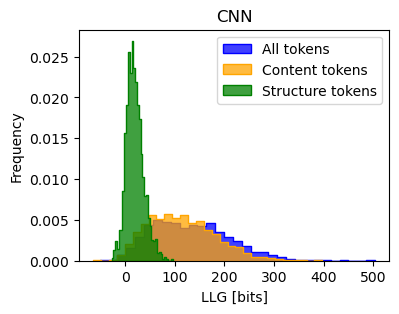

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset and title
dataset_key = "cnn_dailyMail_8"
title = "CNN"

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Extract LLG data
llg, llgc, llgf = extract_llg_data(dataset_key)

# Create the plot
plt.figure(figsize=(4, 3))

sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue")
sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange")
sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green")

plt.xlabel('LLG [bits]')
plt.ylabel('Frequency')
plt.legend()
plt.title(title)

# Save and display the plot
plt.savefig('cnn_histogram_llg.pdf', format='pdf', bbox_inches='tight')
plt.show()


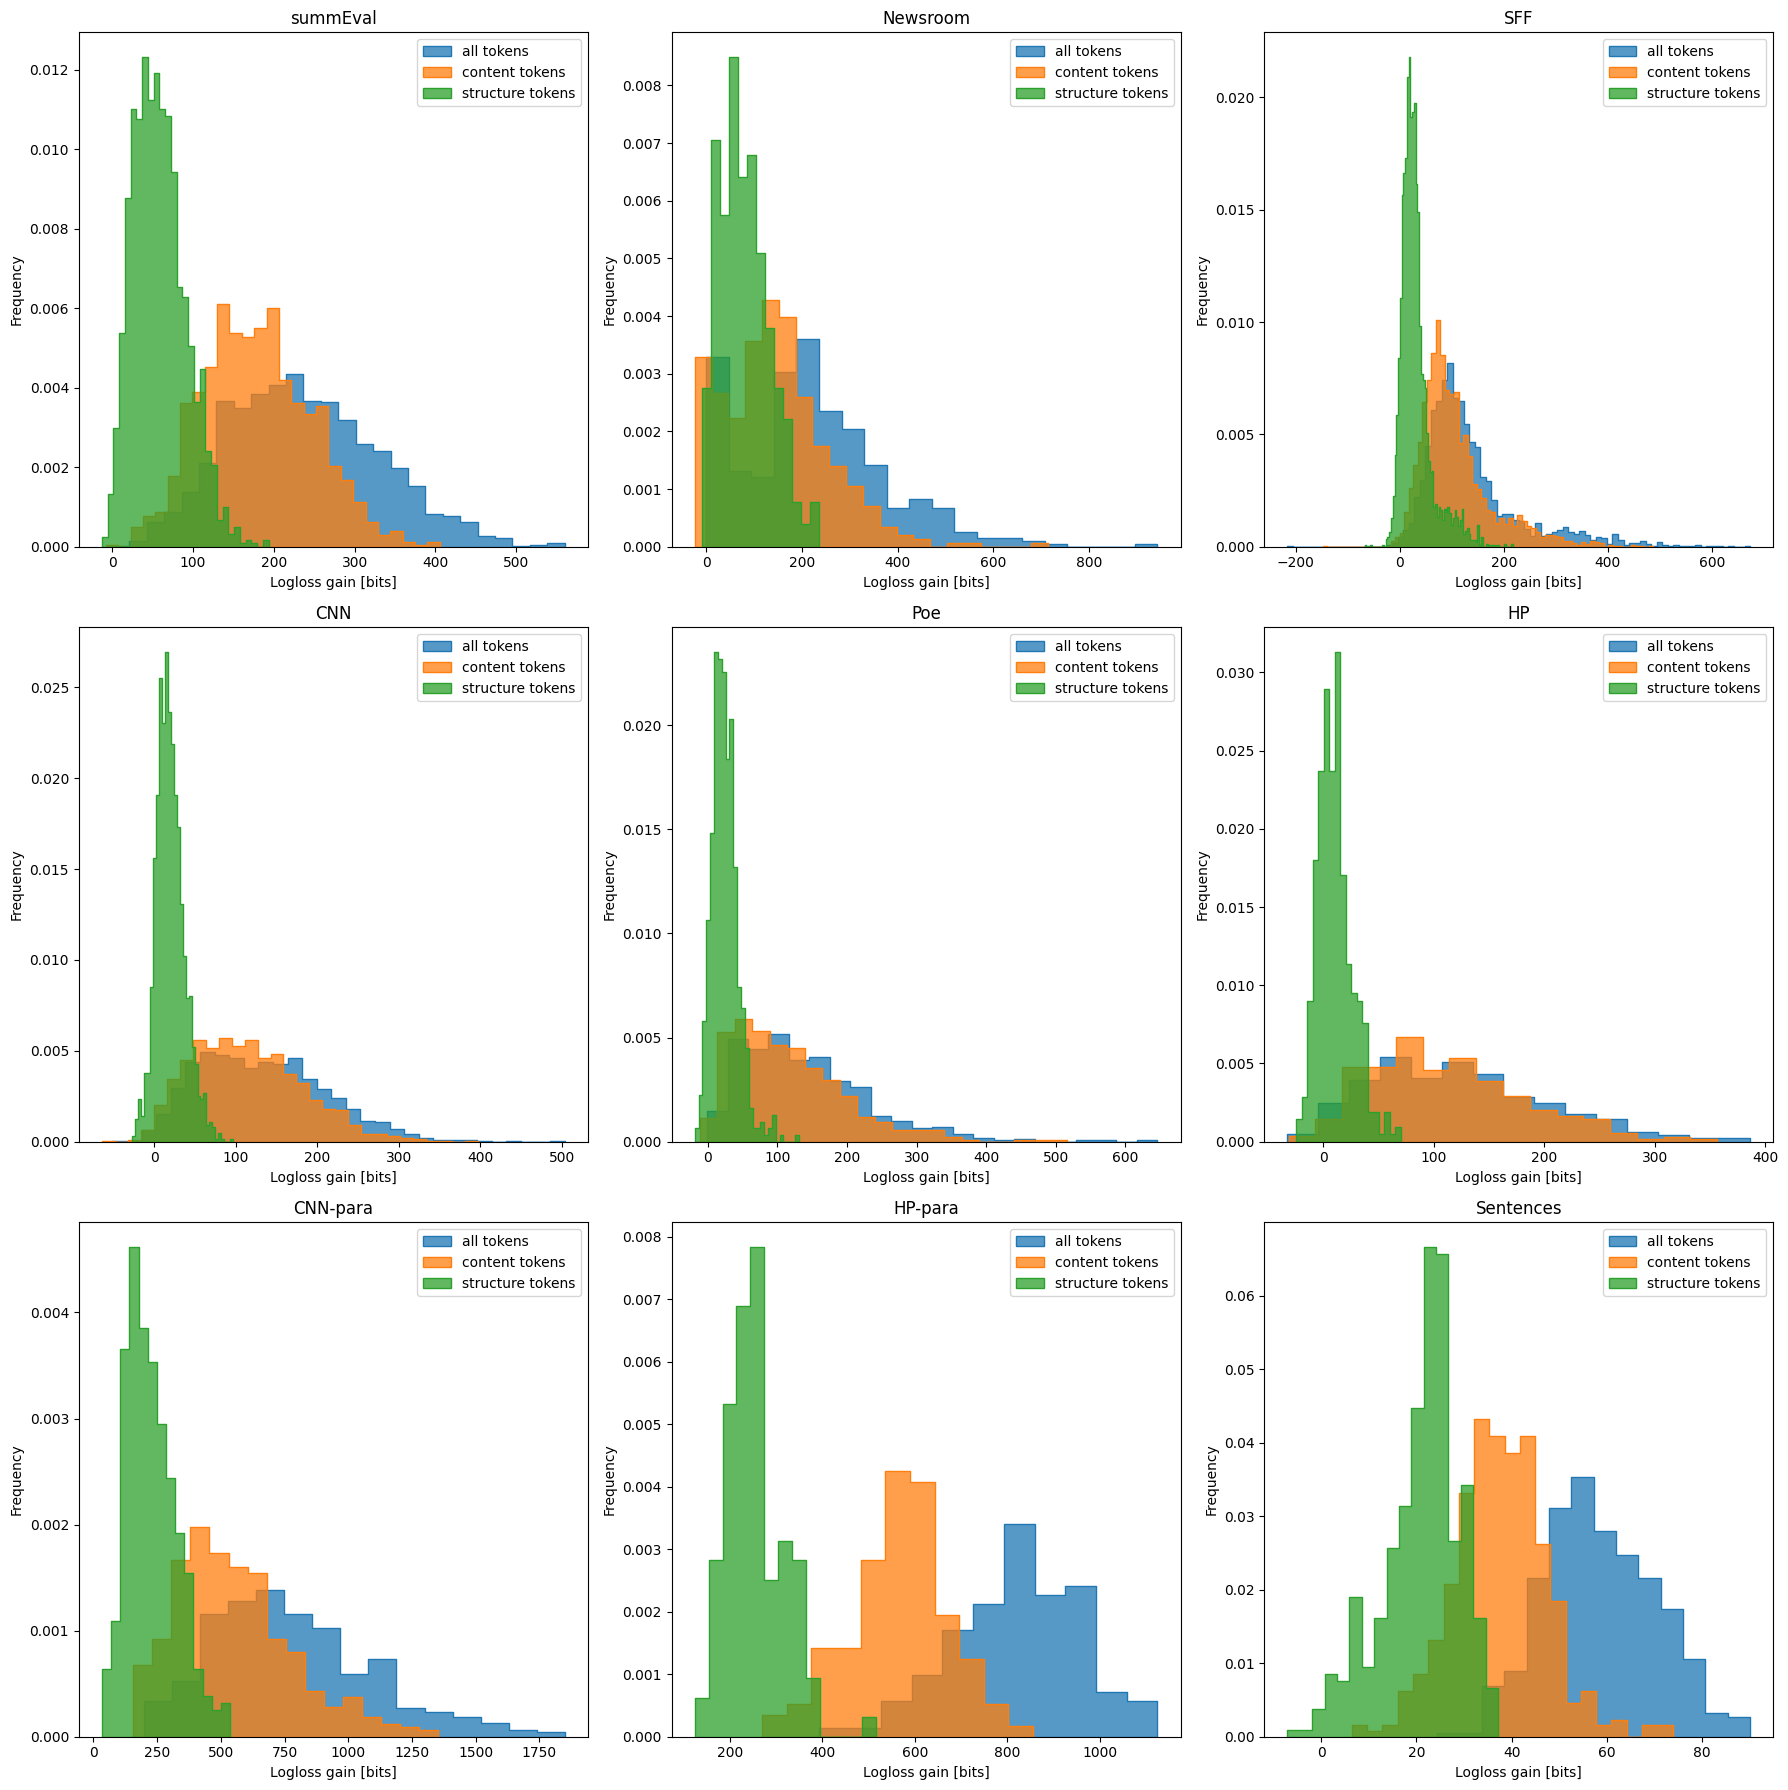

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the datasets and titles for your plots
datasets = {
    "summEval": "summEval",
    "newsroom": "Newsroom",
    "ssf": "SFF",
    "cnn_dailyMail_8" : "CNN",
    "poe_8": "Poe",
    "HP_8": "HP",
    "cnn_para2":"CNN-para",
    "hp_para": "HP-para",
    "yoda_para":"Sentences"
    
    
}

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Create the 2x3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Loop through the datasets and plot them in the respective subplot
for i, (dataset_key, title) in enumerate(datasets.items()):
    row, col = divmod(i, 3)  # Determine the subplot position
    llg, llgc, llgf = extract_llg_data(dataset_key)
    
    sns.histplot(llg, label='all tokens', ax=axs[row, col], stat="density", element="step")
    sns.histplot(llgc, label='content tokens', ax=axs[row, col], stat="density", element="step")
    sns.histplot(llgf, label='structure tokens', ax=axs[row, col], stat="density", element="step")
    
    axs[row, col].set_xlabel('Logloss gain [bits]')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend()
    axs[row, col].set_title(title)

plt.tight_layout()  # Adjusts the spacing between plots
plt.savefig('histogramsIDiff_6plots.pdf', format='pdf', bbox_inches='tight')
plt.show()


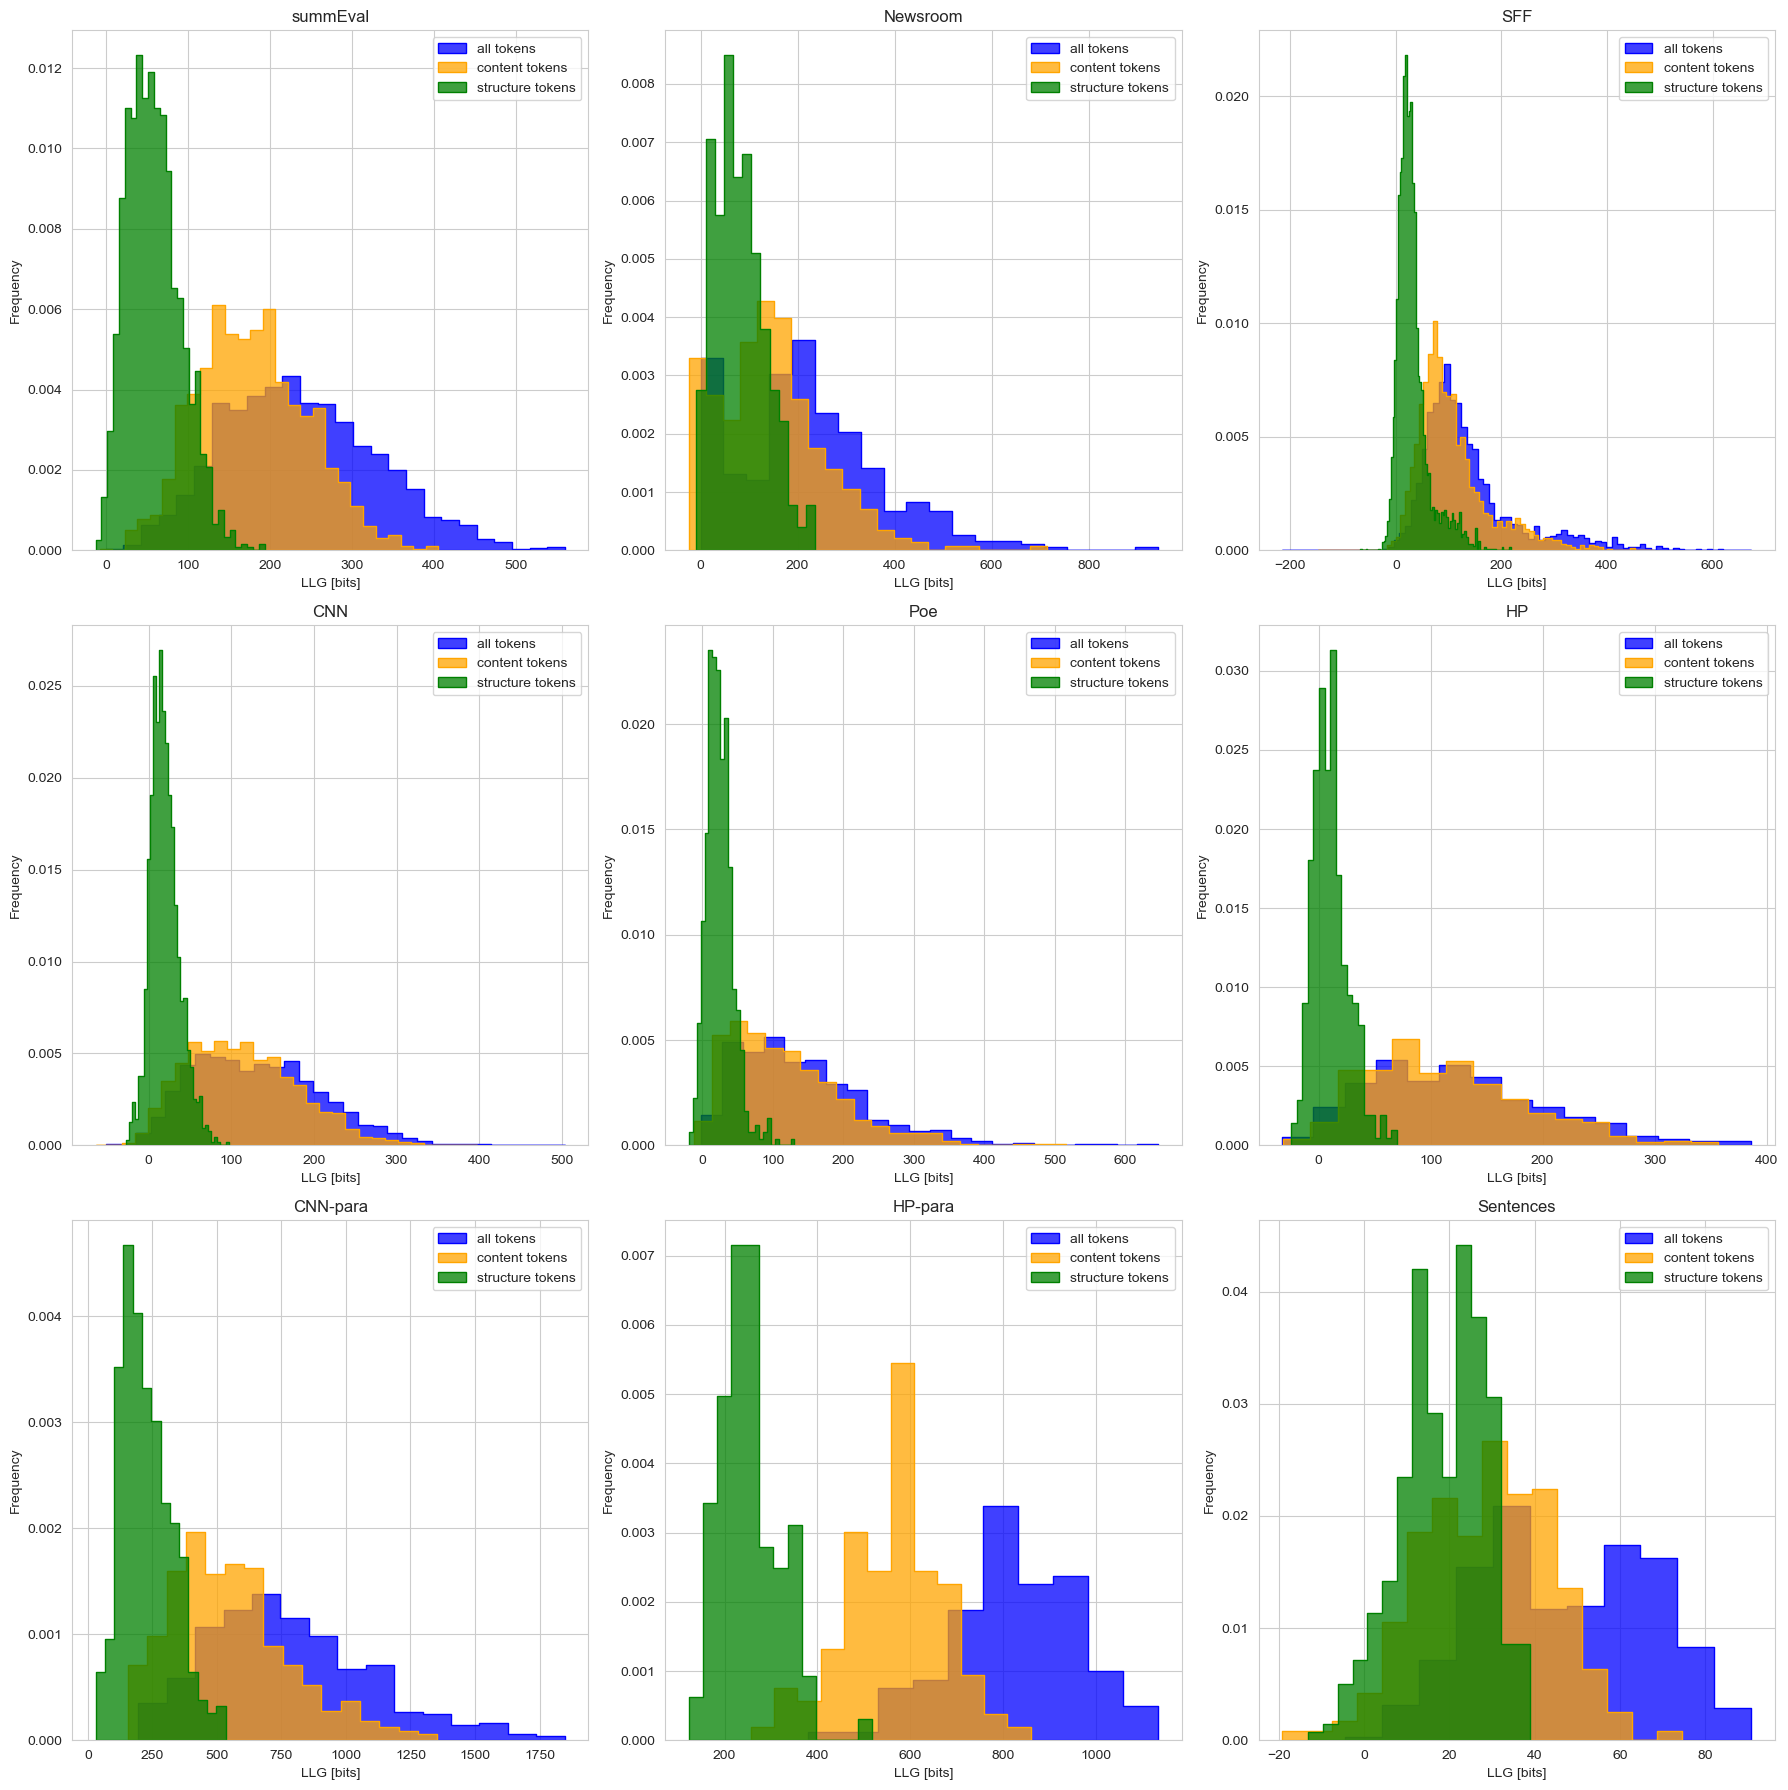

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the datasets and titles for your plots
datasets = {
    "summEval": "summEval",
    "newsroom": "Newsroom",
    "ssf": "SFF",
    "cnn_dailyMail_8" : "CNN",
    "poe_8": "Poe",
    "HP_8": "HP",
    "cnn_para2":"CNN-para",
    "hp_para": "HP-para",
    "yoda_para":"Sentences"
    
    
}

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = dataf["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Create the 2x3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Loop through the datasets and plot them in the respective subplot
for i, (dataset_key, title) in enumerate(datasets.items()):
    row, col = divmod(i, 3)  # Determine the subplot position
    llg, llgc, llgf = extract_llg_data(dataset_key)
    
    sns.histplot(llg, label='all tokens', ax=axs[row, col], stat="density", element="step", color="blue")
    sns.histplot(llgc, label='content tokens', ax=axs[row, col], stat="density", element="step", color="orange")
    sns.histplot(llgf, label='structure tokens', ax=axs[row, col], stat="density", element="step", color="green")
    # sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue")
    # sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange")
    # sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green")
    
    axs[row, col].set_xlabel('LLG [bits]')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend()
    axs[row, col].set_title(title)

plt.tight_layout()  # Adjusts the spacing between plots
plt.savefig('histogramsIDiff_6plots.pdf', format='pdf', bbox_inches='tight')
plt.show()


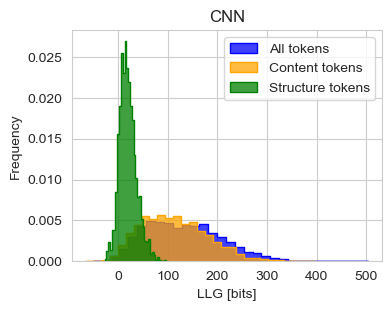

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset and title
dataset_key = "cnn_dailyMail_8"
title = "CNN"

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Extract LLG data
llg, llgc, llgf = extract_llg_data(dataset_key)

# Create the plot
plt.figure(figsize=(4, 3))

sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue")
sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange")
sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green")

plt.xlabel('LLG [bits]')
plt.ylabel('Frequency')
plt.legend()
plt.title(title)

# Save and display the plot
plt.savefig('cnn_histogram_llg.pdf', format='pdf', bbox_inches='tight')
plt.show()


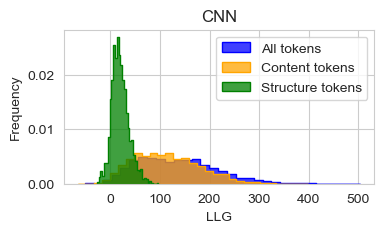

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset and title
dataset_key = "cnn_dailyMail_8"
title = "CNN"

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Extract LLG data
llg, llgc, llgf = extract_llg_data(dataset_key)

# Create the plot
plt.figure(figsize=(4, 2))

sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue")
sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange")
sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green")

plt.xlabel('LLG')
plt.ylabel('Frequency')
plt.legend()
plt.title(title)

# Save and display the plot
plt.savefig('cnn_histogram.pdf', format='pdf', bbox_inches='tight')
plt.show()


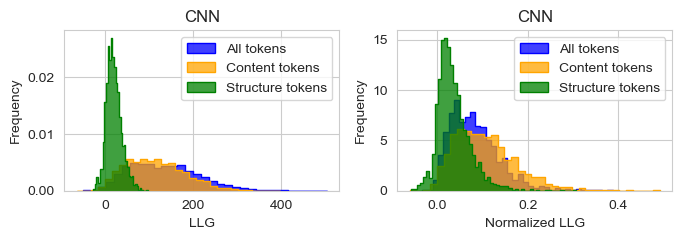

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset and title
dataset_key = "cnn_dailyMail_8"
title = "CNN"

# Define a function to extract LLG data
def extract_llg_data(dataset_key):
    llg = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG"]).tolist()
    llgc = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_content"]).tolist()
    llgf = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["LLG_function"]).tolist()
    return llg, llgc, llgf

# Define a function to extract NLLG data
def extract_nllg_data(dataset_key):
    llg = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG"]).tolist()
    llgc = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG_content"]).tolist()
    llgf = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG_function"]).tolist()
    return llg, llgc, llgf

# Extract LLG and NLLG data
llg, llgc, llgf = extract_llg_data(dataset_key)
nllg, nllgc, nllgf = extract_nllg_data(dataset_key)

# Create two side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(7, 2.5))  # 1 row, 2 columns

# Left plot: LLG data
sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue", ax=axs[0])
sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange", ax=axs[0])
sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green", ax=axs[0])
axs[0].set_xlabel('LLG')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title("CNN")

# Right plot: NLLG data
sns.histplot(nllg, label='All tokens', stat="density", element="step", color="blue", ax=axs[1])
sns.histplot(nllgc, label='Content tokens', stat="density", element="step", color="orange", ax=axs[1])
sns.histplot(nllgf, label='Structure tokens', stat="density", element="step", color="green", ax=axs[1])
axs[1].set_xlabel('Normalized LLG')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title("CNN")

plt.tight_layout()
plt.savefig('cnn_histogram.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset and title
dataset_key = "cnn_dailyMail_8"
title = "CNN"

# Define a function to extract the LLG data
def extract_llg_data(dataset_key):
    llg = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG"]).tolist()
    llgc = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG_content"]).tolist()
    llgf = data["phi2_new"][dataset_key]["llg"].apply(lambda x: x[0]["NLLG_function"]).tolist()
    return llg, llgc, llgf

# Extract LLG data
llg, llgc, llgf = extract_llg_data(dataset_key)

# Create the plot
plt.figure(figsize=(4, 2))

sns.histplot(llg, label='All tokens', stat="density", element="step", color="blue")
sns.histplot(llgc, label='Content tokens', stat="density", element="step", color="orange")
sns.histplot(llgf, label='Structure tokens', stat="density", element="step", color="green")

plt.xlabel('LLG')
plt.ylabel('Frequency')
plt.legend()
plt.title(title)

# Save and display the plot
plt.savefig('cnn_histogram.pdf', format='pdf', bbox_inches='tight')
plt.show()


NameError: name 'data' is not defined

In [15]:
test = [0.65,.84,.95]
print(np.std(test))

0.12391753530294067


In [104]:
hp = pd.read_pickle("HP_8_phi2_final.pkl")

In [52]:
hp.iloc[0]["llg"]

[{'NLLG': 0.04972101094665565,
  'NLLG_content': 0.07410236864141281,
  'NLLG_function': -0.010725419481474992,
  'LLG': 82.36748981308301,
  'LLG_content': 87.47430228612029,
  'LLG_function': -5.10681247303728,
  'll_t_s': 1574.2257339540865,
  'll_t': 1656.5932237671695,
  'average_pred_none': 0.28110920071517576,
  'average_pred_s': 0.3254952583683499,
  'avg_ll_t_s': 4.562973141895903,
  'avg_ll_t': 4.8017194891802015,
  'count_c': 184,
  'count_f': 161}]

In [114]:
def get_content_function(llgs):
    ratios = []
    for idx,llg in enumerate(llgs):
        content_count = llg[0]["count_c"]
        func_count = llg[0]["count_f"]
        ratio = content_count/func_count
        ratios.append(ratio)
    return ratios


In [172]:
def get_content_function(df):
    df = df[["text", "llg"]]
    df = df.drop_duplicates(subset=["text"])
    llgs = df["llg"]
    ratios = []
    for idx,llg in enumerate(llgs):
        content_count = llg[0]["count_c"]
        func_count = llg[0]["count_f"]
        ratio = func_count/(func_count+content_count)
        ratios.append(ratio)
    return ratios


In [167]:
#main_path = "C:/Users/danal/PycharmProjects/Summary_Evaluation_3/cor_data/"
models = ["phi2_final"]
datasets = ["summEval", "poe_8", "cnn_dailyMail_8", "HP_8","ssf","newsroom","cnn_para2","hp_para","yoda_para"]
#datasets = ["summEval"]
main_path = 'C:/Users/danal/OneDrive/שולחן העבודה/LLG_full/cor_data/'
data2 = {}

for model in models:
    data2[model] = {}
    for dataset in datasets:
        print(model,dataset)
        file_path = f"{main_path}{dataset}/{dataset}_{model}.pkl"
        data2[model][dataset] = pd.read_pickle(file_path)



phi2_final summEval
phi2_final poe_8
phi2_final cnn_dailyMail_8
phi2_final HP_8
phi2_final ssf
phi2_final newsroom
phi2_final cnn_para2
phi2_final hp_para
phi2_final yoda_para


In [173]:
total_ratios = []
for dataset in datasets:
    print(dataset)
    ratios = get_content_function(data2["phi2_final"][dataset])
    total_ratios.extend(ratios)


summEval
poe_8
cnn_dailyMail_8
HP_8
ssf
newsroom
cnn_para2
hp_para
yoda_para


In [174]:
np.mean(total_ratios)

0.4790076924617949

In [125]:
np.mean(total_ratios)

1.1138252275580292

In [171]:
np.std(total_ratios)

0.05490611296450772

In [175]:
np.std(total_ratios)

0.05490611296450772

In [253]:
46/50

0.32

In [269]:
gpt4mini = [19,29, 31, 46, 36, 46]
gpt4mini = [item/50 for item in gpt4mini]

gpt4 = [32,33,42,47,42,48]
gpt4 = [item/50 for item in gpt4]

gpt3 = [9,9,12,23,18,30]
gpt3 = [item/50 for item in gpt3]

llg= [44,45,37,39,38,37]
llg = [item/50 for item in llg]

In [288]:
gpt3

[0.18, 0.18, 0.24, 0.46, 0.36, 0.6]

In [287]:
gpt4mini

[0.38, 0.58, 0.62, 0.92, 0.72, 0.92]

In [272]:
llg

[0.88, 0.9, 0.74, 0.78, 0.76, 0.74]

In [270]:
print("gpt3 mean", np.mean(gpt3))
print("gpt3 std", np.std(gpt3))
print("gpt4mini mean", np.mean(gpt4mini))
print("gpt4mini std", np.std(gpt4mini))
print("gpt4o mean", np.mean(gpt4))
print("gpt4o std", np.std(gpt4))
print("llg mean", np.mean(llg))
print("llg std", np.std(llg))

gpt3 mean 0.33666666666666667
gpt3 std 0.15466810344160242
gpt4mini mean 0.69
gpt4mini std 0.19139836293274126
gpt4o mean 0.8133333333333334
gpt4o std 0.12418624006798101
llg mean 0.7999999999999999
llg std 0.06531972647421809


In [ ]:
 perms = {1: [1,2,3],2:[1,3,2],3:[2,1,3],4:[2,3,1],5:[3,1,2],6:[3,2,1]}

In [271]:
gpt4

[0.64, 0.66, 0.84, 0.94, 0.84, 0.96]

In [256]:
gpt4mini

[0.38, 0.58, 0.62, 0.92, 0.72, 0.92]

In [258]:
np.mean(gpt4mini)

0.69

In [259]:
np.std(gpt4mini)

0.19139836293274126

In [51]:
import pandas as pd

# Replace 'file.xlsx' with your actual file path
file_path = 'popular_figures.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

In [52]:
df.head()

,text,revised
0,Bilbo Baggins celebrates his birthday and leav...,Gregor Butler celebrates his birthday and leav...
1,Gandalf suspects it is a Ring of Power; sevent...,Marvin suspects it is a Ring of Power; sevente...
2,Frodo sets out on foot with his cousin Pippin ...,Percy sets out on foot with his cousin Nolan P...
3,The Hobbits take an evasive shortcut to Buckle...,The Hobbits take an evasive shortcut to Riverb...
4,Merry and Pippin reveal they know about the Ri...,Alex and Roy reveal they know about the Ring a...


In [45]:
text1= "BIlbo met Kendra in the park."
text2= "Roy met Layla in the park."

words1 = text1.split(" ")
words2 = text2.split(" ")

In [46]:
words1

['BIlbo', 'met', 'Kendra', 'in', 'the', 'park.']

In [48]:
xor_words = list(set(words1) ^ set(words2))  # Symmetric difference
print(xor_words)

['Kendra', 'BIlbo', 'Roy', 'Layla']


In [63]:
def find_sym_difference(row):
    text1 = row["text"].replace("\xa0", " ")
    text2 = row["revised"].replace("\xa0", " ")
    print(text1)
    words1 = text1.split(" ")
    words2 = text2.split(" ")
    print(words1)
    print(words2)
    xor_words = list(set(words1) ^ set(words2))  # Symmetric difference
    print(xor_words)
    return xor_words
import string

def find_sym_difference(row):
    text1 = row["text"].replace("\xa0", " ")
    text2 = row["revised"].replace("\xa0", " ")

    words1 = [word.rstrip(string.punctuation) for word in text1.split()]
    words2 = [word.rstrip(string.punctuation) for word in text2.split()]

    xor_words = list(set(words1) ^ set(words2))  # Symmetric difference
    print(xor_words)
    return xor_words

df['names'] = df.apply(find_sym_difference, axis = 1)





['Butler', 'Gregor', 'Josh', 'Frodo', 'Bilbo', 'Baggins']
['Felix', 'Sauron', 'Marvin', 'Gandalf', 'Frodo', 'Zarial']
['Sam', 'Took', 'Pippin', 'Liam', 'Price', 'Gamgee', 'Nolan', 'Brooks', 'Percy', 'Frodo']
['Terry', 'Riverbury', 'Bucklebury', 'Greenhill', 'Brandybuck', 'Merry']
['Roy', 'Pippin', 'Frodo', 'Alex', 'Herbert', 'Merry']
['Malgar', 'Zorak', 'Saruman', 'Sauron']
['Gandalf', 'Jonas', 'Logan', 'Legolas', 'Morin', 'Gimli', 'Aragorn', 'Ethan', 'Fangorn', 'Griffin']
['Felix', 'Brandon', 'Greenfield', 'Boromir', 'Galadriel', 'Frodo']
['Pippin', 'Eli', 'Boromir', 'Darian', 'Adam', 'Merry']
['Leo', 'Brian', 'Legolas', 'Gimli', 'Aragorn', 'Stevens']
['James', 'Lily', 'Mia', 'Peter', 'Susan', 'Lucy', 'Edward', 'Edmund']
['Maugrim', 'Alice', 'Peter', 'Morder', 'Tom', 'Susan']
['Edmund', 'Logan', 'Milos', 'Aslan']
['Eliza', 'Susan', 'Lucy', 'Ragnar', 'Aslan', 'Mila']
['James', 'Kirke', 'Eve', 'Kent', 'Pevensie', 'Jillian', 'Peter', 'Lucy', 'Anderson', 'Benedict', 'Edmund', 'Percy', 'Sc

In [62]:
df.head()

,text,revised,names
0,Bilbo Baggins celebrates his birthday and leav...,Gregor Butler celebrates his birthday and leav...,"[Butler, Gregor, Josh, Frodo, Bilbo, Baggins]"
1,Gandalf suspects it is a Ring of Power; sevent...,Marvin suspects it is a Ring of Power; sevente...,"[Felix, Sauron, Marvin, Gandalf, Frodo, Zarial]"
2,Frodo sets out on foot with his cousin Pippin ...,Percy sets out on foot with his cousin Nolan P...,"[Sam, Took, Pippin, Liam, Price, Gamgee, Nolan..."
3,The Hobbits take an evasive shortcut to Buckle...,The Hobbits take an evasive shortcut to Riverb...,"[Terry, Riverbury, Bucklebury, Greenhill, Bran..."
4,Merry and Pippin reveal they know about the Ri...,Alex and Roy reveal they know about the Ring a...,"[Roy, Pippin, Frodo, Alex, Herbert, Merry]"


In [64]:
names = df["names"].tolist()
merged_list = [item for sublist in names for item in sublist]


In [66]:
total_list =[]
for word in merged_list:
    total_list.append(word)
    total_list.append(" " + word)

In [67]:
total_list

['Butler',
 ' Butler',
 'Gregor',
 ' Gregor',
 'Josh',
 ' Josh',
 'Frodo',
 ' Frodo',
 'Bilbo',
 ' Bilbo',
 'Baggins',
 ' Baggins',
 'Felix',
 ' Felix',
 'Sauron',
 ' Sauron',
 'Marvin',
 ' Marvin',
 'Gandalf',
 ' Gandalf',
 'Frodo',
 ' Frodo',
 'Zarial',
 ' Zarial',
 'Sam',
 ' Sam',
 'Took',
 ' Took',
 'Pippin',
 ' Pippin',
 'Liam',
 ' Liam',
 'Price',
 ' Price',
 'Gamgee',
 ' Gamgee',
 'Nolan',
 ' Nolan',
 'Brooks',
 ' Brooks',
 'Percy',
 ' Percy',
 'Frodo',
 ' Frodo',
 'Terry',
 ' Terry',
 'Riverbury',
 ' Riverbury',
 'Bucklebury',
 ' Bucklebury',
 'Greenhill',
 ' Greenhill',
 'Brandybuck',
 ' Brandybuck',
 'Merry',
 ' Merry',
 'Roy',
 ' Roy',
 'Pippin',
 ' Pippin',
 'Frodo',
 ' Frodo',
 'Alex',
 ' Alex',
 'Herbert',
 ' Herbert',
 'Merry',
 ' Merry',
 'Malgar',
 ' Malgar',
 'Zorak',
 ' Zorak',
 'Saruman',
 ' Saruman',
 'Sauron',
 ' Sauron',
 'Gandalf',
 ' Gandalf',
 'Jonas',
 ' Jonas',
 'Logan',
 ' Logan',
 'Legolas',
 ' Legolas',
 'Morin',
 ' Morin',
 'Gimli',
 ' Gimli',
 'Aragorn'

In [68]:
total_list = list(set(total_list))

In [69]:
total_list

['Butler',
 'Luke',
 "Blackwood's",
 ' Greenhill',
 'Kirke',
 'Eddy',
 ' Grumman',
 'Veska',
 'Eve',
 'Liam',
 'Elijah',
 ' Caspian',
 'Samwell',
 'Weasley',
 ' Scoresby',
 ' Eddys',
 ' Jonathan',
 ' Holloway',
 'Lee',
 'Malone',
 ' Mucky',
 ' John',
 'Lyra',
 ' Dylan',
 'Vaes',
 ' Blackstone',
 ' Ellen',
 ' Rover',
 ' Saruman',
 ' Easton',
 ' Lannister',
 ' Langford',
 'Edmund',
 " Tom's",
 'Robb',
 ' Sam',
 ' Brandon',
 "Lee's",
 'Herbert',
 'Faa',
 ' Tyrion',
 'Stanislaus',
 'Lily',
 'Caspian',
 'Diana',
 'Eaglefang',
 ' Maugrim',
 "Vargo's",
 ' Stone',
 'Ranley',
 'Pevensie',
 "Billy's",
 ' Kent',
 ' Evan',
 'Jillian',
 ' Vaes',
 'Merry',
 ' Damian',
 "Rom's",
 ' Azkaban',
 'Mucky',
 ' Dean',
 'Greyjoy',
 ' Riverbury',
 ' Baggins',
 'Draco',
 'Ellen',
 ' Lena',
 'Gamgee',
 'Brooks',
 ' Frodo',
 'Percy',
 'Scrubb',
 'Alden',
 "Eddard's",
 'Helen',
 ' Coulter',
 ' Tarly',
 'Blackwood',
 ' Malgar',
 ' Alden',
 ' Tony',
 'Backshire',
 ' Harper',
 ' Snape',
 "Butler's",
 ' Elijah',
 'Re

In [70]:
with open("cuk_names.pkl", "wb") as f:
    pickle.dump(total_list, f)

In [73]:
with open("curse_knowledge_scores_new.pkl", "rb") as f:
    df_cok = pickle.load(f)

In [74]:
df_cok.head()

,text,revised,scores
0,Bilbo Baggins celebrates his birthday and leav...,Arin sets out on foot with his cousin Jorin Ta...,"{'names_original': 37.15734645789507, 'nonames..."
1,Gandalf suspects it is a Ring of Power; sevent...,Marvin suspects it is a Ring of Power; sevente...,"{'names_original': 37.27238825939639, 'nonames..."
2,Frodo sets out on foot with his cousin Pippin ...,Percy sets out on foot with his cousin Nolan P...,"{'names_original': 46.73303798786037, 'nonames..."
3,The Hobbits take an evasive shortcut to Buckle...,The Hobbits take an evasive shortcut to Riverb...,"{'names_original': 18.42996920618043, 'nonames..."
4,Merry and Pippin reveal they know about the Ri...,Alex and Roy reveal they know about the Ring a...,"{'names_original': 35.39148431622834, 'nonames..."


In [77]:
scores = df_cok["scores"].tolist()
original_names, original_nonames, revised_names, revised_nonames = [],[],[],[]
for score in scores:
    original_names.append(score["names_original"])
    original_nonames.append(score["nonames_original"])
    revised_names.append(score["names_revised"])
    revised_nonames.append(score["nonames_revised"])

In [79]:
print(np.mean(original_names))
print(np.mean(original_nonames))

39.8294169115684
90.79289364155603


In [78]:
print(np.mean(revised_names))
print(np.mean(revised_nonames))

84.20134692891843
112.89588477305303


In [96]:
orignal = 39+90
revised = 84+112

In [98]:
(90*?)+90 = 112

129 196


In [101]:
(112-90)/90

0.24444444444444444

In [102]:
(84-39)/39

1.1538461538461537

In [100]:
(129*0.45) + 129

187.05

In [81]:
112+90

202

In [82]:
123*0.45

55.35

In [83]:
123+55

178